In [1]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#avoid warnings
import warnings
warnings.filterwarnings("ignore")

#import libiary
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn import datasets

#save model
import joblib

dataset link: https://www.kaggle.com/datasets/uciml/indian-liver-patient-records

In [2]:
#import dataset

dataset = pd.read_csv(r"D:\MACHINE LEARNING\FINAL PROJECT\Dataset\health\liver.csv")

In [3]:
#read dataset

dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# understanding dataset

In [4]:
#shape of dataset

dataset.shape

(583, 11)

In [5]:
#information about dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
#describe about dataset

dataset.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
print(dataset.columns)
dataset.isnull().sum()

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [8]:
dataset["Albumin_and_Globulin_Ratio"].unique()

array([0.9 , 0.74, 0.89, 1.  , 0.4 , 1.3 , 1.1 , 1.2 , 0.8 , 0.6 , 0.87,
       0.7 , 0.92, 0.55, 0.5 , 1.85, 0.95, 1.4 , 1.18, 0.61, 1.34, 1.39,
       1.6 , 1.58, 1.25, 0.78, 0.76, 1.55, 0.71, 0.62, 0.67, 0.75, 1.16,
       1.5 , 1.66, 0.96, 1.38, 0.52, 0.47, 0.93, 0.48, 0.58, 0.69, 1.27,
       1.12, 1.06, 0.53, 1.03, 0.68,  nan, 1.9 , 1.7 , 1.8 , 0.3 , 0.97,
       0.35, 1.51, 0.64, 0.45, 1.36, 0.88, 1.09, 1.11, 1.72, 2.8 , 0.46,
       0.39, 1.02, 2.5 , 0.37])

In [9]:
dataset[["Albumin_and_Globulin_Ratio"]] = dataset[["Albumin_and_Globulin_Ratio"]].replace(
    to_replace={np.nan:float(dataset["Albumin_and_Globulin_Ratio"].mean())})

In [10]:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

Number of patients diagnosed with liver disease: 416
Number of patients not diagnosed with liver disease: 167


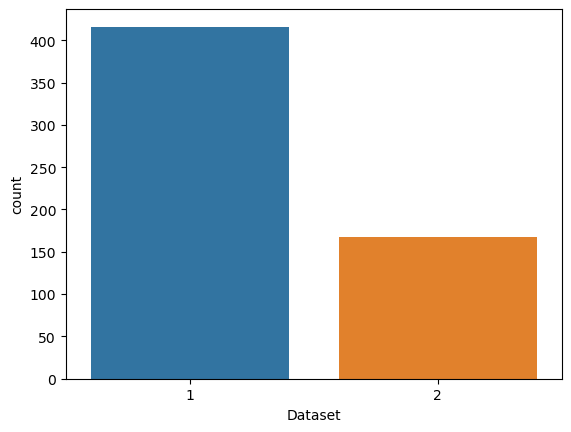

In [11]:
sns.countplot(data=dataset,x="Dataset",label="Count")
LD, NLD = dataset['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: {}'.format(LD))
print('Number of patients not diagnosed with liver disease: {}'.format(NLD))

# Data processing

In [12]:
x = dataset.drop(['Gender','Dataset'], axis=1)
y = dataset['Dataset']                               # 1 for liver disease; 2 for no liver disease

In [13]:
#StandardScaler

Scaler=StandardScaler()
X=Scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# machine learning model selection

LogisticRegression

In [14]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

model1.fit(x_train,y_train)

x_train_pred = model1.predict(x_train)
training_data_Accuracy = accuracy_score(x_train_pred,y_train)
print("Accuracy on Training data: ",training_data_Accuracy*100 )

x_test_pred = model1.predict(x_test)
testing_data_Accuracy = accuracy_score(x_test_pred,y_test)
print("Accuracy on Testing data: ",testing_data_Accuracy*100 )
print()
print(classification_report(y_test,x_test_pred))

Accuracy on Training data:  71.81372549019608
Accuracy on Testing data:  74.28571428571429

              precision    recall  f1-score   support

           1       0.76      0.94      0.84       128
           2       0.56      0.21      0.31        47

    accuracy                           0.74       175
   macro avg       0.66      0.58      0.57       175
weighted avg       0.71      0.74      0.70       175



super vector machine

In [15]:
from sklearn.svm import SVC

model2=SVC()

model2.fit(x_train,y_train)

x_train_pred = model2.predict(x_train)
training_data_Accuracy = accuracy_score(x_train_pred,y_train)
print("Accuracy on Training data: ",training_data_Accuracy*100 )

x_test_pred = model2.predict(x_test)
testing_data_Accuracy = accuracy_score(x_test_pred,y_test)
print("Accuracy on Testing data: ",testing_data_Accuracy*100 )
print()
print(classification_report(y_test,x_test_pred))

Accuracy on Training data:  70.58823529411765
Accuracy on Testing data:  73.14285714285714

              precision    recall  f1-score   support

           1       0.73      1.00      0.84       128
           2       0.00      0.00      0.00        47

    accuracy                           0.73       175
   macro avg       0.37      0.50      0.42       175
weighted avg       0.53      0.73      0.62       175



In [16]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()

model3.fit(x_train,y_train)

x_train_pred = model3.predict(x_train)
training_data_Accuracy = accuracy_score(x_train_pred,y_train)
print("Accuracy on Training data: ",training_data_Accuracy*100 )

x_test_pred = model3.predict(x_test)
testing_data_Accuracy = accuracy_score(x_test_pred,y_test)
print("Accuracy on Testing data: ",testing_data_Accuracy*100 )
print()
print(classification_report(y_test,x_test_pred))

Accuracy on Training data:  100.0
Accuracy on Testing data:  71.42857142857143

              precision    recall  f1-score   support

           1       0.77      0.87      0.82       128
           2       0.45      0.30      0.36        47

    accuracy                           0.71       175
   macro avg       0.61      0.58      0.59       175
weighted avg       0.69      0.71      0.69       175



In [17]:
from sklearn.naive_bayes import GaussianNB
model4=GaussianNB()

model4.fit(x_train,y_train)

x_train_pred = model4.predict(x_train)
training_data_Accuracy = accuracy_score(x_train_pred,y_train)
print("Accuracy on Training data: ",training_data_Accuracy*100 )

x_test_pred = model4.predict(x_test)
testing_data_Accuracy = accuracy_score(x_test_pred,y_test)
print("Accuracy on Testing data: ",testing_data_Accuracy*100 )
print()
print(classification_report(y_test,x_test_pred))

Accuracy on Training data:  53.67647058823529
Accuracy on Testing data:  56.57142857142857

              precision    recall  f1-score   support

           1       0.98      0.41      0.58       128
           2       0.38      0.98      0.55        47

    accuracy                           0.57       175
   macro avg       0.68      0.70      0.57       175
weighted avg       0.82      0.57      0.57       175



# comparely, LogisticRegression give high Accuracy

In [18]:
#predication
#input_Data = [32,1.3,.5,184,29,32,6.8,3.4,1] 
input_Data = [45,1,0.3,216,21,24,7.3,4.4,1.5]
input_data_to_array = np.asarray(input_Data)

input_Data_reshaped = input_data_to_array.reshape(1,-1)

std  = Scaler.transform(input_Data_reshaped)

predication = model1.predict(std)

print(predication)

if predication[0] == 2:
    print("No need to fear. You have no dangerous symptoms of the disease")
    
else:
    print("Sorry you chances of getting the disease. Please consult the doctor immediately")

[2]
No need to fear. You have no dangerous symptoms of the disease


In [19]:
#save the model

#location => D:\MACHINE LEARNING\FINAL PROJECT\Models\health\

import joblib

joblib.dump(model1,r"D:\MACHINE LEARNING\FINAL PROJECT\Models\health\liverDisease_model.pkl")

['D:\\MACHINE LEARNING\\FINAL PROJECT\\Models\\liverDisease_model.pkl']

In [20]:
#load model

load_model = joblib.load(r"D:\MACHINE LEARNING\FINAL PROJECT\Models\health\liverDisease_model.pkl")

#predication
#input_Data = [32,1.3,.5,184,29,32,6.8,3.4,1] 
input_Data = [45,1,0.3,216,21,24,7.3,4.4,1.5]
input_data_to_array = np.asarray(input_Data)

input_Data_reshaped = input_data_to_array.reshape(1,-1)

std  = Scaler.transform(input_Data_reshaped)

predication = load_model.predict(std)

print(predication)

if predication[0] == 2:
    print("No need to fear. You have no dangerous symptoms of the disease")
    
else:
    print("Sorry you chances of getting the disease. Please consult the doctor immediately")

[2]
No need to fear. You have no dangerous symptoms of the disease


# Working Sucessfully